In [1]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


(5937, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5937 entries, 0 to 5936
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  5937 non-null   object
 1   Emotion  5937 non-null   object
dtypes: object(2)
memory usage: 92.9+ KB
None


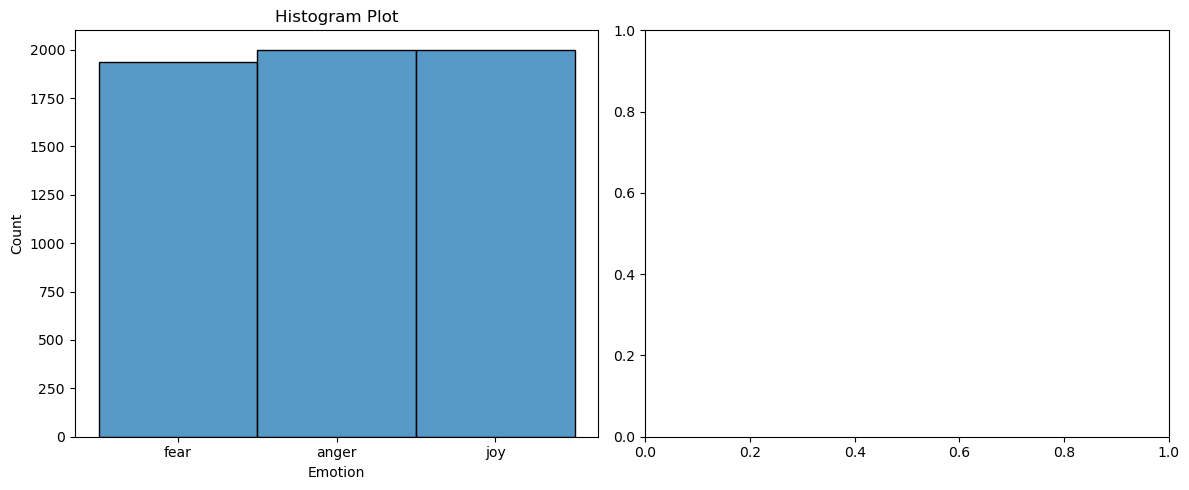

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\tausi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tausi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tausi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


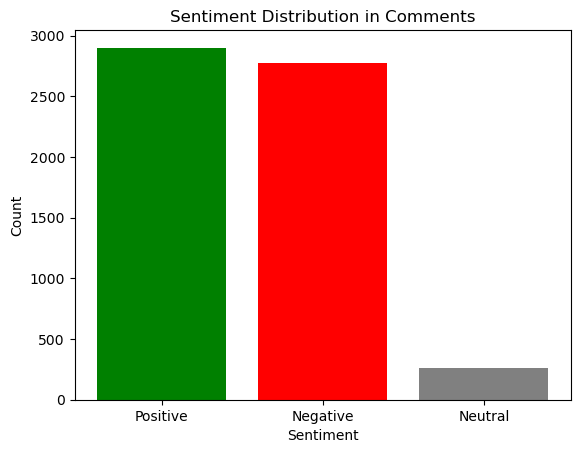

In [2]:
# Import Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for Sentiment Analysis
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from textblob import TextBlob
from nltk.util import ngrams
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Load and Prepare Data
df = pd.read_csv(r"Emotion_classify_Data.csv", lineterminator='\n')
df = df.drop(columns=[])
df.head(10)

# Display basic information about the dataset
print(df.shape)
print(df.info())

# Sort the dataframe by the 'Emotion' column
df.sort_values(by='Emotion')
df.head(10)

# Select relevant columns
col = ['Comment', 'Emotion']
df = df[col]
df.head()

# Drop rows where 'Emotion' is null
df.dropna(subset=['Emotion'], inplace=True)

# Plot histogram of emotions
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
sns.histplot(data=df, x='Emotion', ax=ax[0]).set_title('Histogram Plot')

plt.tight_layout()
plt.show()

# Download necessary NLTK resources
import nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')

# Define function to analyze sentiment
def analyze_sentiment(Comment):
    Comment = str(Comment)
    words = word_tokenize(Comment)  # Tokenize the words in the comment
    stop_words = set(stopwords.words('english'))  # Use English stopwords
    filtered_words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    cleaned_review = ' '.join(filtered_words)

    sid = SentimentIntensityAnalyzer()
    sentiment_scores = sid.polarity_scores(cleaned_review)  # Analyze sentiment

    if sentiment_scores['compound'] >= 0.05:
        return 'Positive'
    elif sentiment_scores['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Analyze sentiment of comments
if 'Comment' in df.columns:
    df['Sentiment'] = df['Comment'].apply(analyze_sentiment)  # Analyze sentiment and store in a new column

    # Count the occurrences of each sentiment
    sentiment_counts = df['Sentiment'].value_counts()

    # Plot the sentiment distribution
    plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red', 'grey'])
    plt.title('Sentiment Distribution in Comments')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.show()


In [3]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


In [4]:
df = pd.read_csv(r"Emotion_classify_Data.csv", lineterminator='\n')


In [5]:
df.dropna(subset=['Emotion'], inplace=True)


In [6]:
def analyze_sentiment(Comment):
    Comment = str(Comment)
    words = word_tokenize(Comment)
    stop_words = set(stopwords.words('english'))
    filtered_words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    cleaned_review = ' '.join(filtered_words)

    sid = SentimentIntensityAnalyzer()
    sentiment_scores = sid.polarity_scores(cleaned_review)

    if sentiment_scores['compound'] >= 0.05:
        return 'Positive'
    elif sentiment_scores['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'


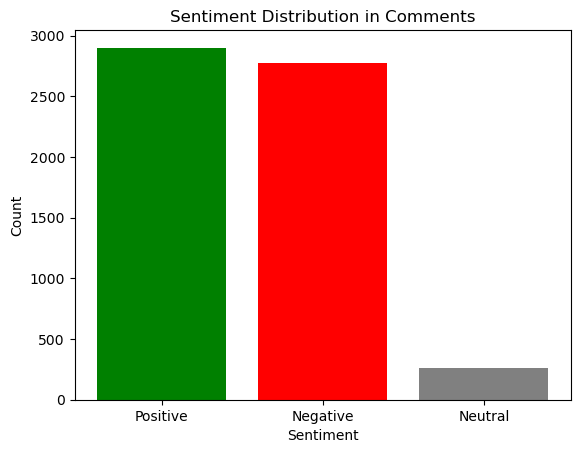

In [7]:
df['Sentiment'] = df['Comment'].apply(analyze_sentiment)
sentiment_counts = df['Sentiment'].value_counts()

plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red', 'grey'])
plt.title('Sentiment Distribution in Comments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()
